#Fire up pandas, numpy and scikit-learn

In [1]:
# author: mxu
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.cross_validation import train_test_split

# make inline plots
import matplotlib.pyplot as plt
%matplotlib inline

#Load some house sales data
Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [3]:
sales = pd.read_csv("home_data.csv")

In [4]:
sales.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000,4,4.50,5420,101930,1,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500,3,2.25,1715,6819,2,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850,3,1.50,1060,9711,1,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500,3,1.00,1780,7470,1,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000,3,2.50,1890,6560,2,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


#Exploring the data for housing sales
The house price is correlated with the number of square feet of living space.

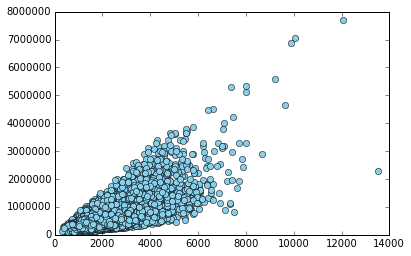

In [5]:
plt.plot(sales['sqft_living'], sales['price'], 'o', color='skyblue')

## The most expensive zip code (which has the highest average house sale price):

In [13]:
expensive_zipcode = sales.groupby('zipcode')['price'].mean().argmax()

In [14]:
print('The most expensive zip code: ', expensive_zipcode)

('The most expensive zip code: ', 98039)


In [15]:
# summary of prices in this zip code 
sales[sales['zipcode'] == expensive_zipcode]['price'].describe()

count         50.000000
mean     2160606.600000
std      1166477.342955
min       787500.000000
25%      1401000.000000
50%      1892500.000000
75%      2556250.000000
max      6885000.000000
Name: price, dtype: float64

## The average price of that zip code

In [16]:
mean_price_of_expensive_zipcode = sales.groupby('zipcode')['price'].mean().max()

In [19]:
print('Zip code {} has an average house price of {}'.format(expensive_zipcode, mean_price_of_expensive_zipcode))

Zip code 98039 has an average house price of 2160606


## Houses that have ‘sqft_living’ higher than 2000 sqft but no larger than 4000 sqft.

In [20]:
sqft_living_lower_bound = 2000 # sqft

In [21]:
sqft_living_upper_bound = 4000 # sqft

In [22]:
# subsetting data between these bounds
houses_in_range = sales[(sales['sqft_living'] > sqft_living_lower_bound) & \
                       (sales['sqft_living'] <= sqft_living_upper_bound)]

In [23]:
# count number of houses in range
house_in_range_count = len(houses_in_range.index)

In [24]:
# total number of houses
house_all_count = len(sales.index)

In [25]:
# fraction of houses in range
fraction_in_range = float(house_in_range_count/house_all_count)

##What fraction of the all houses have ‘sqft_living’ in this range?

In [26]:
print ('Fraction = ', fraction_in_range, '(', house_in_range_count, '/', house_all_count, ')')

('Fraction = ', 0.0, '(', 9118, '/', 21613, ')')


# Building regression models: 

Define a small subset of features:

In [27]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

Subset data

In [35]:
data_my_features = sales[my_features + ['price']]

In [38]:
data_my_features.head(10)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode,price
0,3,1.00,1180,5650,1,98178,221900
1,3,2.25,2570,7242,2,98125,538000
2,2,1.00,770,10000,1,98028,180000
3,4,3.00,1960,5000,1,98136,604000
4,3,2.00,1680,8080,1,98074,510000
5,4,4.50,5420,101930,1,98053,1225000
6,3,2.25,1715,6819,2,98003,257500
7,3,1.50,1060,9711,1,98198,291850
8,3,1.00,1780,7470,1,98146,229500
9,3,2.50,1890,6560,2,98038,323000


In [53]:
#a = pd.get_dummies(data_my_features['bedrooms'], prefix='bedrooms')
#b = pd.get_dummies(data_my_features['bedrooms'], prefix='bedrooms').iloc[:, 1:]

Encode categorical features

In [31]:
# Encode
bedrooms_dummies = pd.get_dummies(data_my_features['bedrooms'], prefix='bedrooms').iloc[:, 1:]
bathrooms_dummies = pd.get_dummies(data_my_features['bathrooms'], prefix='bathrooms').iloc[:, 1:]
floors_dummies = pd.get_dummies(data_my_features['floors'], prefix='floors').iloc[:, 1:]
zipcode_dummies = pd.get_dummies(data_my_features['zipcode'], prefix='zipcode').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data_my_features = pd.concat([data_my_features, bedrooms_dummies, bathrooms_dummies, floors_dummies, zipcode_dummies], axis=1)
data_my_features = data_my_features.drop(['bedrooms', 'bathrooms', 'floors', 'zipcode'], 1)

In [49]:
data_my_features.head(10)
bedrooms_dummies.head()

,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,bedrooms_33
0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0


In [22]:
effective_features = [x for x in data_my_features.columns.values if x != 'price']

In [23]:
len(effective_features)

117

split data into training and testing:

In [24]:
data_train, data_test = train_test_split(data_my_features, test_size=0.20, random_state=0)

## Linear model for the small feature set

In [25]:
data_train_X = data_train[effective_features]
data_train_Y = data_train['price']

data_test_X = data_test[effective_features]
data_test_Y = data_test['price']

In [26]:
data_train_X.head(10)

,sqft_living,sqft_lot,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
5268,1570,5510,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16909,1780,11000,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16123,1090,9862,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12181,2210,7079,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12617,1800,4763,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19024,3100,8000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5063,5070,60123,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9888,1180,4000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2774,1800,5372,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3197,3010,12523,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
data_train_Y.head(10)

5268      495000
16909     635000
16123     382500
12181     382500
12617     670000
19024    1001000
5063     1100000
9888      713000
2774      416000
3197      401000
Name: price, dtype: int64

## Train the model 

In [28]:
lm_small = linear_model.LinearRegression()

In [29]:
lm_small.fit(data_train_X, data_train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
# part of the coefficients
print('Coefficients: \n', lm_small.coef_[1:10])

Coefficients: 
 [  2.08938915e-01   7.31830994e+04   5.42121533e+04   3.17303908e+04
  -9.76391234e+03  -6.25286237e+04  -1.27535750e+05  -3.68092010e+05
  -1.82880420e+05]


##Calculate RMSE

In [31]:
data_test_X.head(10)

,sqft_living,sqft_lot,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
17384,1430,1650,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
722,4670,51836,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2680,1440,3700,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18754,1130,2640,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14554,3180,9603,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
16227,1650,3436,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6631,1720,28000,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19813,2538,4600,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3367,2460,5440,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21372,4460,2975,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
data_test_Y.head(10)

17384     297000
722      1578000
2680      562100
18754     631500
14554     780000
16227     485000
6631      340000
19813     335606
3367      425000
21372     490000
Name: price, dtype: int64

In [33]:
# The root mean squared error (RMSE)
lm_small_RMSE = (np.mean((lm_small.predict(data_test_X) - data_test_Y) ** 2)) ** 0.5
print("Root mean squared error (RMSE): %.2f"
      % lm_small_RMSE )

Root mean squared error (RMSE): 168241.55


In [34]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lm_small.score(data_test_X, data_test_Y))

Variance score: 0.76


## Linear model for the larger feature set

Define a larger subset of features:

In [35]:
advanced_features = [ \
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode', \
'condition', # condition of house \
'grade', # measure of quality of construction \
'waterfront', # waterfront property \
'view', # type of view \
'sqft_above', # square feet above ground \
'sqft_basement', # square feet in basement \
'yr_built', # the year built \
'yr_renovated', # the year renovated \
'lat', 'long', # the lat-long of the parcel \
'sqft_living15', # average sq.ft. of 15 nearest neighbors  \
'sqft_lot15'# average lot size of 15 nearest neighbors  \
]


In [36]:
data_advanced_features = sales[advanced_features + ['price']]
data_advanced_features.head(10)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode,condition,grade,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1,98178,3,7,0,0,1180,0,1955,0,47.5112,-122.257,1340,5650,221900
1,3,2.25,2570,7242,2,98125,3,7,0,0,2170,400,1951,1991,47.7210,-122.319,1690,7639,538000
2,2,1.00,770,10000,1,98028,3,6,0,0,770,0,1933,0,47.7379,-122.233,2720,8062,180000
3,4,3.00,1960,5000,1,98136,5,7,0,0,1050,910,1965,0,47.5208,-122.393,1360,5000,604000
4,3,2.00,1680,8080,1,98074,3,8,0,0,1680,0,1987,0,47.6168,-122.045,1800,7503,510000
5,4,4.50,5420,101930,1,98053,3,11,0,0,3890,1530,2001,0,47.6561,-122.005,4760,101930,1225000
6,3,2.25,1715,6819,2,98003,3,7,0,0,1715,0,1995,0,47.3097,-122.327,2238,6819,257500
7,3,1.50,1060,9711,1,98198,3,7,0,0,1060,0,1963,0,47.4095,-122.315,1650,9711,291850
8,3,1.00,1780,7470,1,98146,3,7,0,0,1050,730,1960,0,47.5123,-122.337,1780,8113,229500
9,3,2.50,1890,6560,2,98038,3,7,0,0,1890,0,2003,0,47.3684,-122.031,2390,7570,323000


In [37]:
# Encode
bedrooms_dummies = pd.get_dummies(data_advanced_features['bedrooms'], prefix='bedrooms').iloc[:, 1:]
bathrooms_dummies = pd.get_dummies(data_advanced_features['bathrooms'], prefix='bathrooms').iloc[:, 1:]
floors_dummies = pd.get_dummies(data_advanced_features['floors'], prefix='floors').iloc[:, 1:]
zipcode_dummies = pd.get_dummies(data_advanced_features['zipcode'], prefix='zipcode').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data_advanced_features = pd.concat([data_advanced_features, bedrooms_dummies, bathrooms_dummies, floors_dummies, zipcode_dummies], axis=1)
data_advanced_features = data_advanced_features.drop(['bedrooms', 'bathrooms', 'floors', 'zipcode'], 1)


In [38]:
data_advanced_features.head(10)

,sqft_living,sqft_lot,condition,grade,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,1180,5650,3,7,0,0,1180,0,1955,0,...,0,0,0,0,0,0,1,0,0,0
1,2570,7242,3,7,0,0,2170,400,1951,1991,...,0,0,0,0,0,0,0,0,0,0
2,770,10000,3,6,0,0,770,0,1933,0,...,0,0,0,0,0,0,0,0,0,0
3,1960,5000,5,7,0,0,1050,910,1965,0,...,0,0,0,0,0,0,0,0,0,0
4,1680,8080,3,8,0,0,1680,0,1987,0,...,0,0,0,0,0,0,0,0,0,0
5,5420,101930,3,11,0,0,3890,1530,2001,0,...,0,0,0,0,0,0,0,0,0,0
6,1715,6819,3,7,0,0,1715,0,1995,0,...,0,0,0,0,0,0,0,0,0,0
7,1060,9711,3,7,0,0,1060,0,1963,0,...,0,0,0,0,0,0,0,0,1,0
8,1780,7470,3,7,0,0,1050,730,1960,0,...,1,0,0,0,0,0,0,0,0,0
9,1890,6560,3,7,0,0,1890,0,2003,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
effective_features = [x for x in data_advanced_features.columns.values if x != 'price']

data_train, data_test = train_test_split(data_advanced_features, test_size=0.20, random_state=0)

data_train_X = data_train[effective_features]
data_train_Y = data_train['price']

data_test_X = data_test[effective_features]
data_test_Y = data_test['price']

### Fit linear model

In [40]:
lm_larger = linear_model.LinearRegression()
lm_larger.fit(data_train_X, data_train_Y)
# The coefficients
print('Coefficients: \n', lm_small.coef_)

Coefficients: 
 [  2.55535253e+02   2.08938915e-01   7.31830994e+04   5.42121533e+04
   3.17303908e+04  -9.76391234e+03  -6.25286237e+04  -1.27535750e+05
  -3.68092010e+05  -1.82880420e+05  -4.68559355e+05  -5.81477650e+05
  -1.52624515e+05   1.03941276e+05  -1.27471290e+05  -2.27908191e+04
  -6.25034309e+04  -1.11302578e+05  -9.60612744e+04  -1.04200879e+05
  -1.04240657e+05  -9.93803575e+04  -1.06045291e+05  -1.05001035e+05
  -9.36456167e+04  -6.28378309e+03  -6.58996847e+04   5.60373408e+04
   8.15197198e+04   1.73820557e+05   9.92883921e+04   4.35561082e+05
   4.43627828e+05   2.75967326e+05   6.20775335e+05  -6.99803603e+04
   1.06818435e+06   8.46037677e+05  -7.71590593e+03   5.17204591e+05
  -2.99116898e+05   3.38338859e+06   1.65696026e+06   7.58729279e+03
  -8.79144696e+02   1.19826476e+05  -3.13902810e+04   8.35279164e+04
   7.63839183e+03   6.67492836e+03   8.02241876e+05   3.46024941e+05
   3.13341144e+05   2.88097888e+05   3.17684934e+05   6.62643227e+04
   1.22869633e+05 

In [41]:
# The root mean squared error (RMSE)
lm_larger_RMSE = (np.mean((lm_larger.predict(data_test_X) - data_test_Y) ** 2)) ** 0.5
print("Root mean squared error (RMSE): %.2f"
      %  lm_larger_RMSE)

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lm_larger.score(data_test_X, data_test_Y))

Root mean squared error (RMSE): 146693.36
Variance score: 0.82


###What is the difference in RMSE between the model trained with my_features and the one trained with advanced_features? 

In [42]:
RMSE_difference = lm_small_RMSE - lm_larger_RMSE
print('RMSE difference: %.2f (%.2f - %.2f)' % (RMSE_difference , lm_small_RMSE, lm_larger_RMSE))

RMSE difference: 21548.19 (168241.55 - 146693.36)
